In [50]:
import pickle

with open('../temp-bak-best/checkpoint/from_scratch/from_scratch_training_history.pickle', 'rb') as f:
    history = pickle.load(f)
history.history.keys()

dict_keys(['loss', 'gender_output_loss', 'age_output_loss', 'gender_output_accuracy', 'age_output_mean_absolute_error', 'val_loss', 'val_gender_output_loss', 'val_age_output_loss', 'val_gender_output_accuracy', 'val_age_output_mean_absolute_error'])

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

# visualizza a video alcune informazioni testuali di base sul training del modello
# e due grafici per analizzare l'andamento della loss e dell'accuracy durante il training
def resume_model_history_regression(history, early_stop = True):
  if early_stop:
    # verifico se l'early stop è entrato in funzione, se si prendo l'epoca in cui
    # si è fermato il training, altrimenti l'epoca migliore (corrisponderà al tot. max delle epoche)
    tot_epoch, best_epoch = len(history.epoch), np.argmin(history.history['val_loss']) + 1
  # senza early_stopping l'ultima epoca e la migliore coincidono
  else:
    tot_epoch = len(history.epoch)
    best_epoch = tot_epoch

  # visualizzo i risultati in forma testuale
  print("Numero di epoche totali:", tot_epoch)
  print("Epoca migliore (weights restored):", best_epoch)
  print("Accuracy training set all'epoca " + str(best_epoch) + ': '
        + str(history.history['mae'][best_epoch -1]))
  print("Accuracy validation set all'epoca " + str(best_epoch) + ': '
        + str(history.history['val_mae'][best_epoch -1]))
  print("Loss training set all'epoca " + str(best_epoch) + ': '
        + str(history.history['loss'][best_epoch -1]))
  print("Loss validation set all'epoca " + str(best_epoch) + ': '
        + str(history.history['val_loss'][best_epoch -1]))

  print('\n\n')

  # visualizzo i grafici di loss e mae per training e validation
  fig = plt.figure(figsize =(20, 6))

  plt.subplot(1, 2, 1)
  plt.xlabel('Epochs'); plt.ylabel('Loss');  plt.title('Model loss')
  # punti asse x
  plt.xticks(np.arange(len(history.epoch)), np.arange(1, len(history.epoch)+1))
  # visualizzo tutti i punti fino all'early stopping
  plt.plot(range(0,best_epoch,1),
           history.history['loss'][:best_epoch], '.-', color="C0") # loss train
  plt.plot(range(0,best_epoch,1),
           history.history['val_loss'][:best_epoch], '.-', color="C1") # loss val
  # visualizzo tutti i punti dopo l'early stopping in modo tratteggiato
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['loss'][best_epoch-1:], '.--', color="C0") # loss train
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['val_loss'][best_epoch-1:], '.--', color="C1") # loss val
  plt.legend(['Training', 'Validation'])

  # stesso procedimento per l'accuracy
  plt.subplot(1, 2, 2)
  plt.xlabel('Epochs'); plt.ylabel('Loss');  plt.title('Model mae')
  # punti asse x
  plt.xticks(np.arange(len(history.epoch)), np.arange(1, len(history.epoch)+1))
  # visualizzo tutti i punti fino all'early stopping
  plt.plot(range(0,best_epoch,1),
           history.history['mae'][:best_epoch], '.-', color="C0") # loss train
  plt.plot(range(0,best_epoch,1),
           history.history['val_mae'][:best_epoch], '.-', color="C1") # loss val
  # visualizzo tutti i punti dopo l'early stopping in modo tratteggiato
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['mae'][best_epoch-1:], '.--', color="C0") # loss train
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['val_mae'][best_epoch-1:], '.--', color="C1") # loss val
  plt.legend(['Training', 'Validation'])

  plt.savefig('../doc/images/from_scratch_training_history_age.png')


  # visualizza a video alcune informazioni testuali di base sul training del modello
# e due grafici per analizzare l'andamento della loss e dell'accuracy durante il training
def resume_model_history_classification(history, early_stop = True):
  # estraggo il numero di epoche nel caso in cui l'early stopping è stato utilizzato
  if early_stop:
    # verifico se l'early stop è entrato in funzione, se si prendo l'epoca in cui
    # si è fermato il training, altrimenti l'epoca migliore (corrisponderà al tot. max delle epoche)
    tot_epoch, best_epoch = len(history.epoch), np.argmin(history.history['val_loss']) + 1
  # senza early_stopping l'ultima epoca e la migliore coincidono
  else:
    tot_epoch = len(history.epoch)
    best_epoch = tot_epoch

  # visualizzo i risultati in forma testuale
  print("Numero di epoche totali:", tot_epoch)
  print("Epoca migliore (weights restored):", best_epoch)
  print("Accuracy training set all'epoca " + str(best_epoch) + ': '
        + str(history.history['accuracy'][best_epoch -1]))
  print("Accuracy validation set all'epoca " + str(best_epoch) + ': '
        + str(history.history['val_accuracy'][best_epoch -1]))
  print("Loss training set all'epoca " + str(best_epoch) + ': '
        + str(history.history['loss'][best_epoch -1]))
  print("Loss validation set all'epoca " + str(best_epoch) + ': '
        + str(history.history['val_loss'][best_epoch -1]))

  print('\n\n')

  # visualizzo i grafici di loss e accuracy per training e validation
  fig = plt.figure(figsize =(20, 6))

  plt.subplot(1, 2, 1)
  plt.xlabel('Epochs'); plt.ylabel('Loss');  plt.title('Model loss')
  # punti asse x
  plt.xticks(np.arange(len(history.epoch)), np.arange(1, len(history.epoch)+1))
  # visualizzo tutti i punti fino all'early stopping
  plt.plot(range(0,best_epoch,1),
           history.history['loss'][:best_epoch], '.-', color="C0") # loss train
  plt.plot(range(0,best_epoch,1),
           history.history['val_loss'][:best_epoch], '.-', color="C1") # loss val
  # visualizzo tutti i punti dopo l'early stopping in modo tratteggiato
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['loss'][best_epoch-1:], '.--', color="C0") # loss train
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['val_loss'][best_epoch-1:], '.--', color="C1") # loss val
  plt.legend(['Training', 'Validation'])

  # stesso procedimento per l'accuracy
  plt.subplot(1, 2, 2)
  plt.xlabel('Epochs'); plt.ylabel('Loss');  plt.title('Model accuracy')
  # punti asse x
  plt.xticks(np.arange(len(history.epoch)), np.arange(1, len(history.epoch)+1))
  # visualizzo tutti i punti fino all'early stopping
  plt.plot(range(0,best_epoch,1),
           history.history['accuracy'][:best_epoch], '.-', color="C0") # loss train
  plt.plot(range(0,best_epoch,1),
           history.history['val_accuracy'][:best_epoch], '.-', color="C1") # loss val
  # visualizzo tutti i punti dopo l'early stopping in modo tratteggiato
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['accuracy'][best_epoch-1:], '.--', color="C0") # loss train
  plt.plot(range(best_epoch-1, len(history.epoch),1),
           history.history['val_accuracy'][best_epoch-1:], '.--', color="C1") # loss val
  plt.legend(['Training', 'Validation'], loc='lower right')

  plt.savefig('../doc/images/from_scratch_training_history_gender.png')

In [52]:
# Gender
history_gender = deepcopy(history.history)
history_gender['val_loss'] = history_gender['val_gender_output_loss']
history_gender['val_accuracy'] = history_gender['val_gender_output_accuracy']
history_gender['loss'] = history_gender['gender_output_loss']
history_gender['accuracy'] = history_gender['gender_output_accuracy']

history_keras_gender = deepcopy(history)
history_keras_gender.history = history_gender

# Age
history_age = deepcopy(history.history)
history_age['val_loss'] = history_age['val_age_output_loss']
history_age['val_mae'] = history_age['val_age_output_mean_absolute_error']
history_age['loss'] = history_age['age_output_loss']
history_age['mae'] = history_age['age_output_mean_absolute_error']
history_keras_age = deepcopy(history)
history_keras_age.history = history_age


INFO:tensorflow:Assets written to: ram://71dc5d9a-8e0b-4cc9-95ba-c2f85c523548/assets
INFO:tensorflow:Assets written to: ram://b4556f0c-12bc-4da0-a882-b47e9a2163e6/assets


Numero di epoche totali: 22
Epoca migliore (weights restored): 7
Accuracy training set all'epoca 7: 0.9159481525421143
Accuracy validation set all'epoca 7: 0.9033392071723938
Loss training set all'epoca 7: 0.2026503086090088
Loss validation set all'epoca 7: 0.22306519746780396





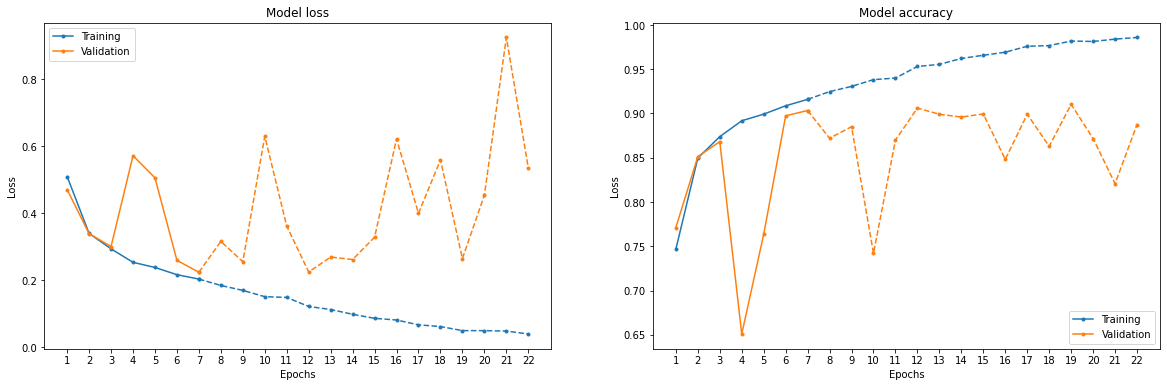

In [56]:
resume_model_history_classification(history_keras_gender)

Numero di epoche totali: 22
Epoca migliore (weights restored): 12
Accuracy training set all'epoca 12: 0.07667582482099533
Accuracy validation set all'epoca 12: 0.07841360569000244
Loss training set all'epoca 12: 0.010419020429253578
Loss validation set all'epoca 12: 0.010303109884262085





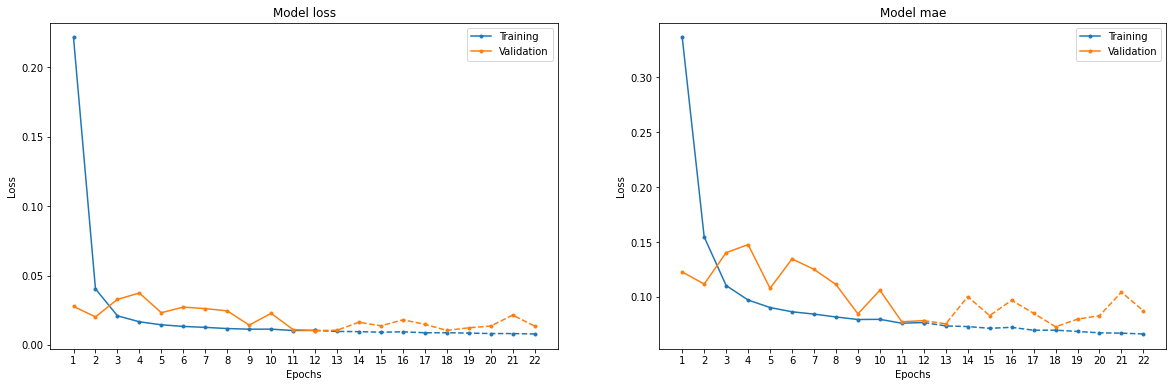

In [57]:
resume_model_history_regression(history_keras_age)